In [1]:
%load_ext autoreload
%autoreload 2
%cd ~/dev/neurad-studio/

/home/gasparyanartur/dev/neurad-studio


In [2]:
from pathlib import Path
from nerfstudio.generative.dynamic_dataset import DynamicDataset, PandasetInfoGetter, PoseDataGetter, CameraDataGetter, RGBDataGetter, MetaDataGetter
from nerfstudio.data.datamanagers.ad_datamanager import ADDataManagerConfig
from nerfstudio.data.dataparsers.pandaset_dataparser import PandaSetDataParserConfig

import matplotlib.pyplot as plt
from copy import deepcopy

import torch
import torchvision.transforms as tvtf

from nerfstudio.cameras.cameras import Cameras
from nerfstudio.pipelines.imaginedriving_pipeline import augment_ray_bundle, rotate_around
from nerfstudio.generative.dynamic_dataset import norm_img_crop_pipeline
from nerfstudio.generative.utils import show_img

import torch
from nerfstudio.model_components.ray_generators import RayGenerator



In [11]:



datamanager_1=ADDataManagerConfig(
        dataparser=PandaSetDataParserConfig(
            add_missing_points=True,
            cameras=("front",),
            sequence="001"
        ),
        num_processes=0,
    ).setup()

datamanager_2=ADDataManagerConfig(
        dataparser=PandaSetDataParserConfig(
            add_missing_points=True,
            cameras=("front_left",),
            sequence="001"
        ),
        num_processes=0,
    ).setup()

Output()

Output()

Setting up evaluation dataset...

Caching all 40 images.

Output()

Caching all 40 images.

Output()

Output()

Output()

Setting up evaluation dataset...

Caching all 40 images.

Output()

Caching all 40 images.

Output()

torch.Size([512, 512, 3])


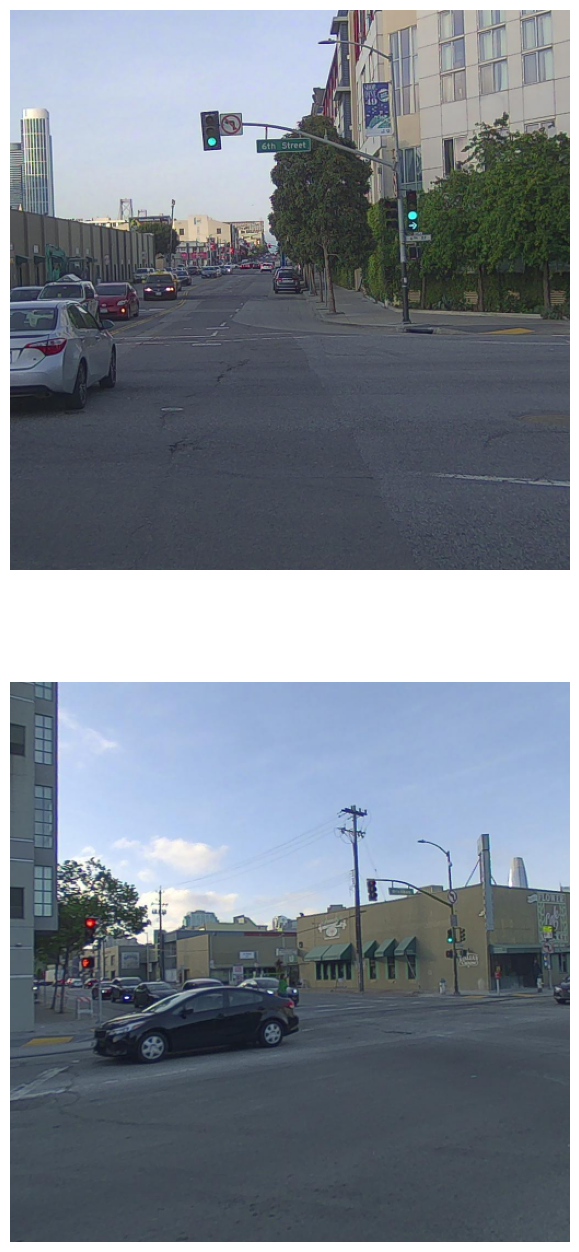

In [24]:

ex_img = datamanager_1.train_dataset.get_image_float32(0).permute(2, 0, 1)
ex_img = norm_img_crop_pipeline(ex_img).permute(1, 2, 0)


ex_img_2 = datamanager_2.train_dataset.get_image_float32(0).permute(2, 0, 1)
ex_img_2 = norm_img_crop_pipeline(ex_img_2).permute(1, 2, 0)

print(ex_img.shape)
show_img((ex_img, ex_img_2))

In [175]:
datamanager_1.setup_train()
datamanager_2.setup_train()

Output()

Output()

Output()

Output()

In [176]:
ray_gen = datamanager_1.train_ray_generator

In [210]:
a = torch.cartesian_prod(torch.arange(1), torch.arange(512), torch.arange(512))
a.shape

torch.Size([262144, 3])

In [214]:
a.reshape(1, 512, 512, 3)[0, 312, 312]

tensor([  0, 312, 312])

In [218]:
r = ray_gen.forward(torch.cartesian_prod(torch.arange(1), torch.arange(512), torch.arange(512))).reshape((1, 512, 512))
r.origins.shape

torch.Size([1, 512, 512, 3])

In [13]:


info_getter = PandasetInfoGetter()
specs = {"camera": "front_camera"}
dataset = DynamicDataset(
    Path("data/pandaset"),
    {"pandaset":{"001": [str(i).rjust(2, "0") for i in range(0, 80)]}},
    info_getter,
    {
        "pose": PoseDataGetter(info_getter, {"camera": "front_camera"}),
        "camera": CameraDataGetter(info_getter, {"camera": "front_camera"}),
        "rgb": RGBDataGetter(info_getter, {"camera": "front_camera"}),
        "meta": MetaDataGetter(info_getter, {"camera": "front_camera"}),
    }
)
dataset[0]

/home/gasparyanartur/dev/neurad-studio/nerfstudio/generative/data.py:272: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  times=torch.tensor(timestamps),


{'pose': tensor([[ 7.0375e-01,  2.4243e-02, -7.1004e-01,  4.0899e-01],
         [-7.0956e-01, -2.6047e-02, -7.0416e-01,  2.6131e-01],
         [-3.5565e-02,  9.9937e-01, -1.1287e-03,  1.8092e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]),
 'camera': Cameras(camera_to_worlds=tensor([[ 7.0375e-01,  2.4243e-02, -7.1004e-01,  4.0899e-01],
         [-7.0956e-01, -2.6047e-02, -7.0416e-01,  2.6131e-01],
         [-3.5565e-02,  9.9937e-01, -1.1287e-03,  1.8092e+00]]), fx=tensor([1970.0131]), fy=tensor([1970.0092]), cx=tensor([970.0002]), cy=tensor([483.2988]), width=tensor([1920]), height=tensor([1080]), distortion_params=None, camera_type=tensor([1]), times=tensor([1.5575e+09], dtype=torch.float64), metadata={'sensor_idxs': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        

In [14]:
dataset[0]["camera"]

/home/gasparyanartur/dev/neurad-studio/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Cameras(camera_to_worlds=tensor([[ 7.0375e-01,  2.4243e-02, -7.1004e-01,  4.0899e-01],
        [-7.0956e-01, -2.6047e-02, -7.0416e-01,  2.6131e-01],
        [-3.5565e-02,  9.9937e-01, -1.1287e-03,  1.8092e+00]]), fx=tensor([1970.0131]), fy=tensor([1970.0092]), cx=tensor([970.0002]), cy=tensor([483.2988]), width=tensor([1920]), height=tensor([1080]), distortion_params=None, camera_type=tensor([1]), times=tensor([1.5575e+09], dtype=torch.float64), metadata={'sensor_idxs': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79])})

In [18]:

gen = RayGenerator(dataset.data_getters["camera"].cameras)

idxs = torch.cartesian_prod(torch.arange(1), torch.arange(512), torch.arange(512))
gen.forward(idxs)

RayBundle(origins=tensor([[0.4090, 0.2613, 1.8092],
        [0.4090, 0.2613, 1.8092],
        [0.4090, 0.2613, 1.8092],
        ...,
        [0.4090, 0.2613, 1.8092],
        [0.4090, 0.2613, 1.8092],
        [0.4090, 0.2613, 1.8092]]), directions=tensor([[ 0.3239,  0.9175,  0.2309],
        [ 0.3243,  0.9173,  0.2310],
        [ 0.3247,  0.9172,  0.2310],
        ...,
        [ 0.5308,  0.8475, -0.0047],
        [ 0.5312,  0.8472, -0.0048],
        [ 0.5316,  0.8470, -0.0048]]), pixel_area=tensor([[1.7439e-07],
        [1.7449e-07],
        [1.7460e-07],
        ...,
        [2.3785e-07],
        [2.3792e-07],
        [2.3805e-07]]), camera_indices=tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]), nears=None, fars=tensor([[1000000.],
        [1000000.],
        [1000000.],
        ...,
        [1000000.],
        [1000000.],
        [1000000.]]), metadata={'sensor_idxs': tensor([[ 0,  1,  2,  ..., 77, 78, 79],
        [ 0,  1,  2,  ..., 77, 7

In [27]:
from nerfstudio.generative.dynamic_dataset import crop_to_sensor_idxs



sensor_idxs = crop_to_sensor_idxs(torch.tensor([1]), torch.tensor([512, 512]), torch.tensor([512, 512]))


tensor([[   1,  512,  512],
        [   1,  512,  513],
        [   1,  512,  514],
        ...,
        [   1, 1023, 1021],
        [   1, 1023, 1022],
        [   1, 1023, 1023]])

In [6]:
data_config = {
    "dataset": "pandaset",
    "path": "data/pandaset",
    "data_getters": {
        "rgb": {
            "camera": "front_left_camera"
        },

        "cn_rgb_3_front_camera": {},
        "prompt": {"type": "static", "positive_prompt": "", "negative_prompt": ""},
        "meta": {},
        "cn_ray_6_front_camera": {}
    },
    "data_tree": {
        "pandaset": {
            "001": ["01"]
        }
    }
}
dataset = DynamicDataset.from_config(
    data_config
)

In [7]:
dataset[0]

/home/gasparyanartur/dev/neurad-studio/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


{'rgb': tensor([[[0.2824, 0.2902, 0.2941,  ..., 0.5882, 0.5882, 0.5882],
          [0.2941, 0.3020, 0.3059,  ..., 0.5882, 0.5882, 0.5882],
          [0.3255, 0.3333, 0.3333,  ..., 0.5843, 0.5843, 0.5843],
          ...,
          [0.2510, 0.2510, 0.2510,  ..., 0.2627, 0.2627, 0.2627],
          [0.2510, 0.2510, 0.2510,  ..., 0.2745, 0.2667, 0.2627],
          [0.2510, 0.2510, 0.2510,  ..., 0.2824, 0.2745, 0.2667]],
 
         [[0.3882, 0.3961, 0.4000,  ..., 0.6902, 0.6902, 0.6902],
          [0.4000, 0.4078, 0.4118,  ..., 0.6902, 0.6902, 0.6902],
          [0.4314, 0.4392, 0.4392,  ..., 0.6863, 0.6863, 0.6863],
          ...,
          [0.2902, 0.2902, 0.2902,  ..., 0.3059, 0.3059, 0.3059],
          [0.2902, 0.2902, 0.2902,  ..., 0.3176, 0.3098, 0.3059],
          [0.2902, 0.2902, 0.2902,  ..., 0.3255, 0.3176, 0.3098]],
 
         [[0.4157, 0.4235, 0.4275,  ..., 0.8353, 0.8353, 0.8353],
          [0.4275, 0.4353, 0.4392,  ..., 0.8353, 0.8353, 0.8353],
          [0.4667, 0.4745, 0.4745